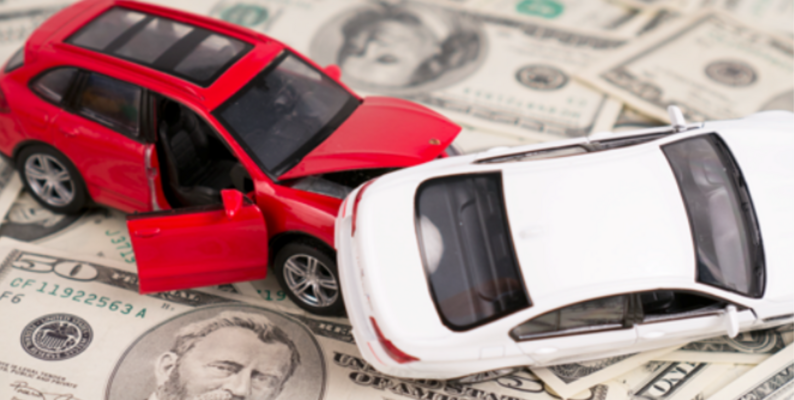

I utilised multiple machine learning techniques to predict vehicle insurance claim fraud, focusing on enhancing the accuracy and reliability of fraud detection models. Through comprehensive exploratory data analysis (EDA) using Python and libraries such as NumPy, Pandas, Seaborn, and Matplotlib, key insights were derived to understand fraud patterns. I implemented classification algorithms, including RandomForestClassifier and DecisionTreeClassifier, to effectively identify fraudulent claims. This project showcases a structured approach to solving real-world fraud detection problems with advanced data science methodologies.I utilised multiple machine learning techniques to predict vehicle insurance claim fraud, focusing on enhancing the accuracy and reliability of fraud detection models. Through comprehensive exploratory data analysis (EDA) using Python and libraries such as NumPy, Pandas, Seaborn, and Matplotlib, key insights were derived to understand fraud patterns. I implemented classification algorithms, including RandomForestClassifier and DecisionTreeClassifier, to effectively identify fraudulent claims. This project showcases a structured approach to solving real-world fraud detection problems with advanced data science methodologies.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\Datasets\\fraud_oracle.csv')
df.sample(7)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
12183,Feb,4,Saturday,Mazda,Urban,Wednesday,Mar,1,Male,Single,31,Third Party,Sedan - Collision,Sedan,30000 to 39000,0,12184,14,700,3,more than 30,more than 30,none,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Collision
7087,Feb,2,Tuesday,BMW,Urban,Friday,Feb,2,Male,Married,42,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,7088,16,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability
1083,Oct,3,Wednesday,Honda,Urban,Wednesday,Oct,3,Male,Married,42,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,0,1084,10,400,1,more than 30,more than 30,none,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils
11510,Aug,3,Tuesday,Toyota,Urban,Thursday,Aug,3,Male,Married,32,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,11511,5,400,2,more than 30,more than 30,1,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
7736,Aug,3,Tuesday,Mazda,Urban,Wednesday,Aug,3,Female,Married,32,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,7737,11,400,3,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1995,Liability
14556,Dec,3,Monday,Mazda,Urban,Friday,Dec,4,Male,Married,63,Third Party,Sport - Collision,Sport,more than 69000,0,14557,15,400,1,more than 30,more than 30,1,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,1996,Collision
729,Mar,3,Wednesday,Mazda,Rural,Friday,Mar,3,Male,Married,37,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,730,16,400,2,more than 30,more than 30,2 to 4,7 years,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,Liability


In [5]:
sum(df.isna().sum())

0

In [66]:
#df.loc[df.FraudFound_P==1]
df.PolicyNumber.value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5145     1
5146     1
5147     1
5148     1
15420    1
Name: PolicyNumber, Length: 15420, dtype: int64

# Exploratory Data Analysis

In [17]:
# Assuming unique_values has already been created
unique_values = {col: df[col].unique().tolist() for col in df.columns}

# Printing unique values starting from index 22
for col in list(unique_values.keys())[22:]:
    print(f"{col}: {unique_values[col]}")

PastNumberOfClaims: ['none', '1', '2 to 4', 'more than 4']
AgeOfVehicle: ['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new', '4 years', '2 years']
AgeOfPolicyHolder: ['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25', '36 to 40', '16 to 17', 'over 65', '18 to 20']
PoliceReportFiled: ['No', 'Yes']
WitnessPresent: ['No', 'Yes']
AgentType: ['External', 'Internal']
NumberOfSuppliments: ['none', 'more than 5', '3 to 5', '1 to 2']
AddressChange_Claim: ['1 year', 'no change', '4 to 8 years', '2 to 3 years', 'under 6 months']
NumberOfCars: ['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8']
Year: [1994, 1995, 1996]
BasePolicy: ['Liability', 'Collision', 'All Perils']


<Axes: xlabel='FraudFound_P', ylabel='count'>

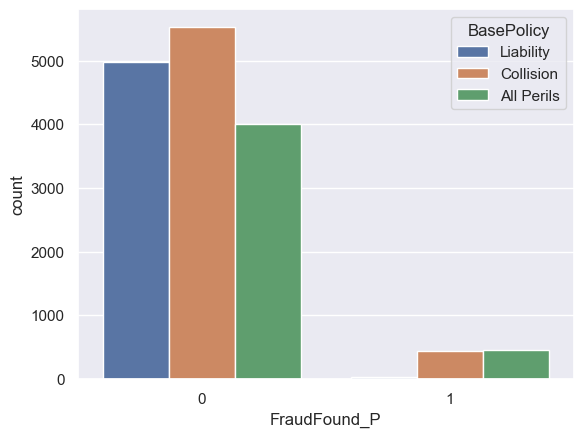

In [18]:
sns.countplot(data=df, x="FraudFound_P", hue="BasePolicy")
#Liability BasePolicy are unlikely to do fraud vehicle insurance claim

<Axes: xlabel='FraudFound_P', ylabel='count'>

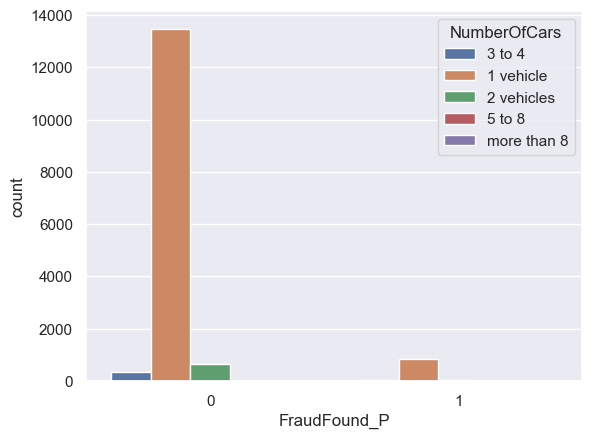

In [19]:
sns.countplot(data=df, x="FraudFound_P", hue="NumberOfCars")

<Axes: xlabel='Age', ylabel='Count'>

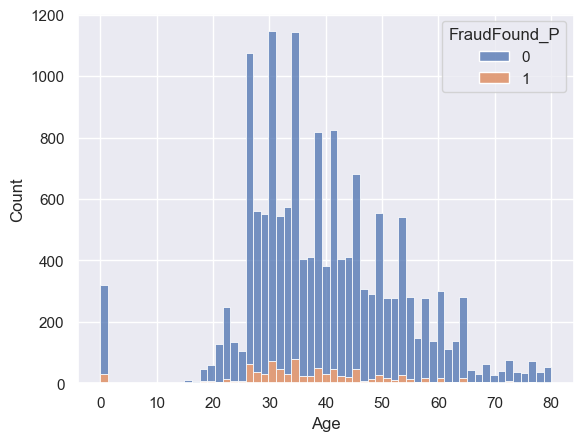

In [20]:
sns.histplot(data=df, x="Age", hue="FraudFound_P", multiple="stack")

<Axes: xlabel='FraudFound_P', ylabel='count'>

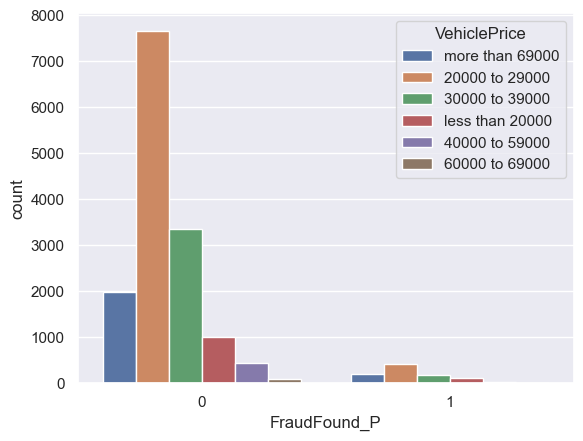

In [21]:
sns.countplot(data=df, x="FraudFound_P", hue="VehiclePrice")

<Axes: xlabel='FraudFound_P', ylabel='count'>

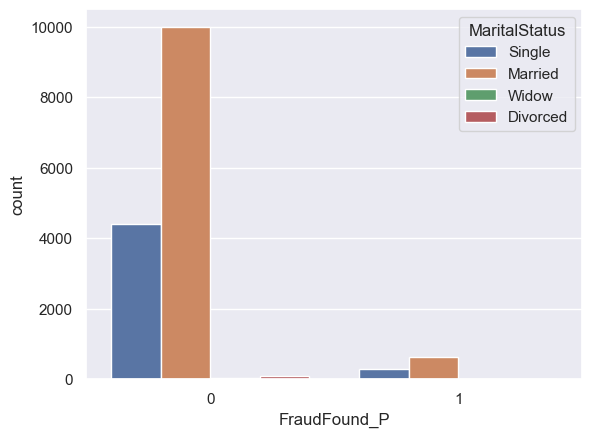

In [22]:
sns.countplot(data=df, x="FraudFound_P", hue="MaritalStatus")

<Axes: xlabel='FraudFound_P', ylabel='count'>

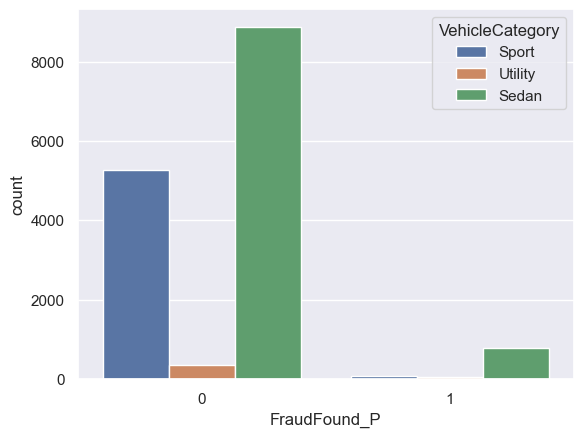

In [23]:
sns.countplot(data=df, x="FraudFound_P", hue="VehicleCategory")
#People with sport car are less likely to do fraud nisurance claim

<Axes: xlabel='FraudFound_P', ylabel='count'>

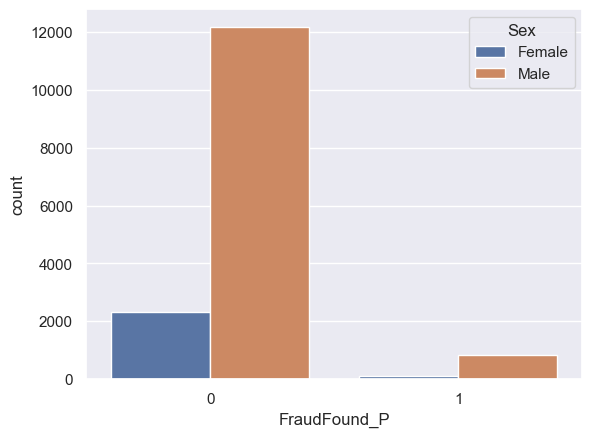

In [24]:
sns.countplot(data=df, x="FraudFound_P", hue="Sex")

<Axes: xlabel='FraudFound_P', ylabel='count'>

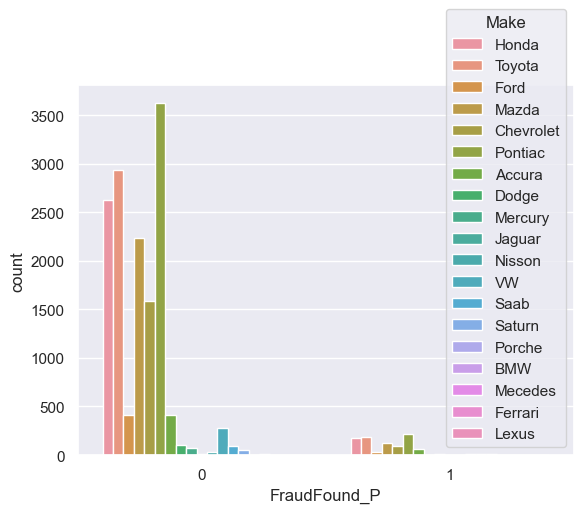

In [25]:
sns.countplot(data=df, x="FraudFound_P", hue="Make")

<Axes: xlabel='FraudFound_P', ylabel='count'>

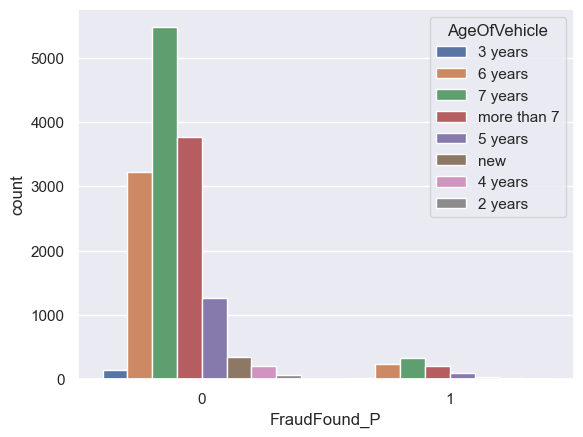

In [26]:
sns.countplot(data=df, x="FraudFound_P", hue="AgeOfVehicle")

# Data Preprocessing

In [27]:
print(df.apply(lambda col: col.unique()))

Month                   [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...
WeekOfMonth                                               [5, 3, 2, 4, 1]
DayOfWeek               [Wednesday, Friday, Saturday, Monday, Tuesday,...
Make                    [Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...
AccidentArea                                               [Urban, Rural]
DayOfWeekClaimed        [Tuesday, Monday, Thursday, Friday, Wednesday,...
MonthClaimed            [Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...
WeekOfMonthClaimed                                        [1, 4, 2, 3, 5]
Sex                                                        [Female, Male]
MaritalStatus                          [Single, Married, Widow, Divorced]
Age                     [21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52...
Fault                                        [Policy Holder, Third Party]
PolicyType              [Sport - Liability, Sport - Collision, Sedan -...
VehicleCategory                       

In [8]:
df.select_dtypes(include='object').nunique()

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

In [9]:
df.drop(columns=['MonthClaimed','Month'], inplace=True)
df.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,Wednesday,Honda,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,3,Wednesday,Honda,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,5,Friday,Honda,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,2,Saturday,Toyota,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,5,Monday,Honda,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [10]:
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [11]:
##Importing Joblib for saving encoders
import joblib

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DayOfWeek']= label_encoder.fit_transform(df['DayOfWeek'])

joblib.dump(label_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\day_of_week_label_encoder.pkl')

df['DayOfWeek'].unique()

array([6, 0, 2, 1, 5, 3, 4])

In [13]:
make_encoder = preprocessing.LabelEncoder()
df['Make']= make_encoder.fit_transform(df['Make'])

joblib.dump(make_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\make_encoder.pkl')

df['Make'].unique()

array([ 6, 17,  5,  9,  2, 13,  0,  3, 11,  7, 12, 18, 15, 16, 14,  1, 10,
        4,  8])

In [14]:
accident_area_encoder = preprocessing.LabelEncoder()

df['AccidentArea']= accident_area_encoder.fit_transform(df['AccidentArea'])
joblib.dump(accident_area_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\accident_area_encoder.pkl')
df['AccidentArea'].unique()

array([1, 0])

In [15]:
day_of_week_encoder = preprocessing.LabelEncoder()

df['DayOfWeekClaimed']= day_of_week_encoder.fit_transform(df['DayOfWeekClaimed'])
joblib.dump(day_of_week_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\day_of_week_encoder.pkl')

df['DayOfWeekClaimed'].unique()

array([6, 2, 5, 1, 7, 3, 4, 0])

In [16]:
sex_encoder = preprocessing.LabelEncoder()

df['Sex']= sex_encoder.fit_transform(df['Sex'])

joblib.dump(sex_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\sex_encoder.pkl')

df['Sex'].unique()

array([0, 1])

In [17]:
marital_status_encoder = preprocessing.LabelEncoder()

df['MaritalStatus']= marital_status_encoder.fit_transform(df['MaritalStatus'])
joblib.dump(marital_status_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\marital_status_encoder.pkl')
df['MaritalStatus'].unique()

array([2, 1, 3, 0])

In [18]:
fault_encoder = preprocessing.LabelEncoder()

df['Fault']= fault_encoder.fit_transform(df['Fault'])

joblib.dump(fault_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\fault_encoder.pkl')

df['Fault'].unique()

array([0, 1])

In [19]:
vehicle_category_encoder = preprocessing.LabelEncoder()

df['VehicleCategory']= vehicle_category_encoder.fit_transform(df['VehicleCategory'])

joblib.dump(vehicle_category_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\vehicle_category_encoder.pkl')

df['VehicleCategory'].unique()

array([1, 2, 0])

In [20]:
vehicle_price_encoder = preprocessing.LabelEncoder()


df['VehiclePrice']= vehicle_price_encoder.fit_transform(df['VehiclePrice'])

joblib.dump(vehicle_price_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\vehicle_price_encoder.pkl')

df['VehiclePrice'].unique()

array([5, 0, 1, 4, 2, 3])

In [21]:
days_policy_accident_encoder = preprocessing.LabelEncoder()

df['Days_Policy_Accident']= days_policy_accident_encoder.fit_transform(df['Days_Policy_Accident'])

joblib.dump(days_policy_accident_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\days_policy_accident_encoder.pkl')

df['Days_Policy_Accident'].unique()

array([3, 1, 4, 0, 2])

In [22]:
days_policy_claim_encoder = preprocessing.LabelEncoder()

df['Days_Policy_Claim']= days_policy_claim_encoder.fit_transform(df['Days_Policy_Claim'])

joblib.dump(days_policy_claim_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\days_policy_claim_encoder.pkl')

df['Days_Policy_Claim'].unique()

array([2, 0, 1, 3])

In [23]:
past_number_of_claims_encoder = preprocessing.LabelEncoder()

df['PastNumberOfClaims']= past_number_of_claims_encoder.fit_transform(df['PastNumberOfClaims'])
joblib.dump(past_number_of_claims_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\past_number_of_claims_encoder.pkl')
df['PastNumberOfClaims'].unique()

array([3, 0, 1, 2])

In [24]:
age_of_vehicle_encoder = preprocessing.LabelEncoder()


df['AgeOfVehicle']= age_of_vehicle_encoder.fit_transform(df['AgeOfVehicle'])

joblib.dump(age_of_vehicle_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\age_of_vehicle_label_encoder.pkl')

df['AgeOfVehicle'].unique()

array([1, 4, 5, 6, 3, 7, 2, 0])

In [25]:
age_of_policy_holder_encoder = preprocessing.LabelEncoder()

df['AgeOfPolicyHolder']= age_of_policy_holder_encoder.fit_transform(df['AgeOfPolicyHolder'])

joblib.dump(age_of_policy_holder_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\age_of_policy_holder_encoder.pkl')

df['AgeOfPolicyHolder'].unique()

array([3, 4, 6, 7, 2, 5, 0, 8, 1])

In [26]:
police_report_filed_encoder = preprocessing.LabelEncoder()


df['PoliceReportFiled']= police_report_filed_encoder.fit_transform(df['PoliceReportFiled'])

joblib.dump(police_report_filed_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\police_report_filed_encoder.pkl')

df['PoliceReportFiled'].unique()

array([0, 1])

In [27]:
witness_present_encoder = preprocessing.LabelEncoder()


df['WitnessPresent']= witness_present_encoder.fit_transform(df['WitnessPresent'])

joblib.dump(witness_present_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\witness_present_encoder.pkl')

df['WitnessPresent'].unique()

array([0, 1])

In [28]:
agent_type_encoder = preprocessing.LabelEncoder()

df['AgentType']= agent_type_encoder.fit_transform(df['AgentType'])

joblib.dump(agent_type_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\agent_type_encoder.pkl')

df['AgentType'].unique()

array([0, 1])

In [29]:
number_of_suppliments_encoder = preprocessing.LabelEncoder()


df['NumberOfSuppliments']= number_of_suppliments_encoder.fit_transform(df['NumberOfSuppliments'])

joblib.dump(number_of_suppliments_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\number_of_suppliments_encoder.pkl')

df['NumberOfSuppliments'].unique()

array([3, 2, 1, 0])

In [30]:
address_change_encoder = preprocessing.LabelEncoder()

df['AddressChange_Claim']= address_change_encoder.fit_transform(df['AddressChange_Claim'])

joblib.dump(address_change_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\address_change_encoder.pkl')

df['AddressChange_Claim'].unique()

array([0, 3, 2, 1, 4])

In [31]:
number_of_cars_encoder = preprocessing.LabelEncoder()

df['NumberOfCars']= number_of_cars_encoder.fit_transform(df['NumberOfCars'])

joblib.dump(number_of_cars_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\number_of_cars_encoder.pkl')

df['NumberOfCars'].unique()

array([2, 0, 1, 3, 4])

In [32]:
policy_type_encoder = preprocessing.LabelEncoder()


df['PolicyType']= policy_type_encoder.fit_transform(df['PolicyType'])

joblib.dump(policy_type_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\policy_type_encoder.pkl')

df['PolicyType'].unique()

array([5, 4, 2, 6, 0, 1, 7, 8, 3])

In [33]:
base_policy_encoder = preprocessing.LabelEncoder()

df['BasePolicy']= base_policy_encoder.fit_transform(df['BasePolicy'])

joblib.dump(base_policy_encoder, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\base_policy_encoder.pkl')

df['BasePolicy'].unique()

array([2, 1, 0])

In [36]:
df.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,6,6,1,6,1,0,2,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,3,6,6,1,2,4,1,2,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,5,0,6,1,5,2,1,1,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,2,2,17,0,1,1,1,1,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,5,1,6,1,6,2,0,2,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


In [37]:
df.dtypes

WeekOfMonth             int64
DayOfWeek               int32
Make                    int32
AccidentArea            int32
DayOfWeekClaimed        int32
WeekOfMonthClaimed      int64
Sex                     int32
MaritalStatus           int32
Age                     int64
Fault                   int32
PolicyType              int32
VehicleCategory         int32
VehiclePrice            int32
FraudFound_P            int64
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
Days_Policy_Accident    int32
Days_Policy_Claim       int32
PastNumberOfClaims      int32
AgeOfVehicle            int32
AgeOfPolicyHolder       int32
PoliceReportFiled       int32
WitnessPresent          int32
AgentType               int32
NumberOfSuppliments     int32
AddressChange_Claim     int32
NumberOfCars            int32
Year                    int64
BasePolicy              int32
dtype: object

0    14497
1      923
Name: FraudFound_P, dtype: int64

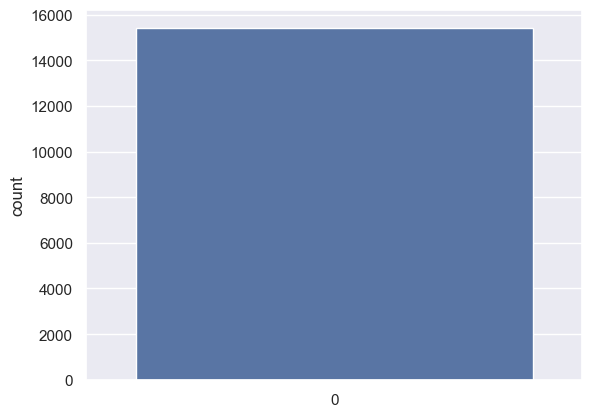

In [38]:
#Check the target (FraudFound_P) if its balanced or not
sns.countplot(df['FraudFound_P'])
df['FraudFound_P'].value_counts()

In [39]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['FraudFound_P']==0)] 
df_minority = df[(df['FraudFound_P']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 14497, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    14497
0    14497
Name: FraudFound_P, dtype: int64

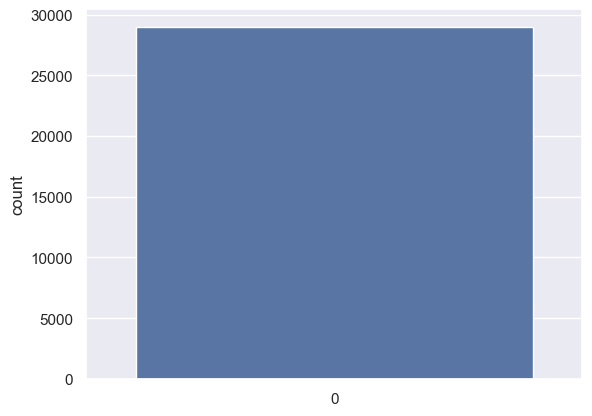

In [40]:
sns.countplot(df_upsampled['FraudFound_P'])
df_upsampled['FraudFound_P'].value_counts()

In [41]:
#Remove the outlier using Z-Score
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(22889, 31)

# Machine Learning Model Building

In [42]:
data_clean = data_clean.drop(columns=['WeekOfMonth','DayOfWeek','Age','RepNumber','Year'])

In [43]:
data_clean.head(5)

,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
10927,9,1,6,4,1,1,0,1,0,0,1,10928,400,3,3,2,1,3,4,0,0,0,2,3,0,1
8784,17,1,5,2,1,1,0,0,0,5,1,8785,400,4,3,2,3,6,6,0,0,0,2,3,0,0
2973,6,1,7,2,1,1,0,4,1,5,1,2974,400,4,3,2,3,4,4,0,0,0,3,3,0,1
12292,13,1,6,4,1,1,0,1,0,0,1,12293,400,3,3,2,1,4,5,0,0,0,1,3,0,1
11296,2,0,7,1,1,1,0,1,0,5,1,11297,400,2,3,2,0,6,6,0,0,0,0,3,0,1


In [44]:
X = data_clean.drop('FraudFound_P', axis=1)
y = data_clean['FraudFound_P']

In [45]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

joblib.dump(dtree, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\models\\insurance_fraud_detection_decision_tree_model2.pkl')

['C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\models\\insurance_fraud_detection_decision_tree_model2.pkl']

In [47]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.07 %


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9707295762341633
Precision Score :  0.9431239388794567
Recall Score :  1.0


In [49]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
10,PolicyNumber,0.225498
24,BasePolicy,0.180245
6,Fault,0.164152
0,Make,0.055110
2,DayOfWeekClaimed,0.053089
3,WeekOfMonthClaimed,0.049851
17,AgeOfPolicyHolder,0.045365
16,AgeOfVehicle,0.034905
21,NumberOfSuppliments,0.034134
9,VehiclePrice,0.033920


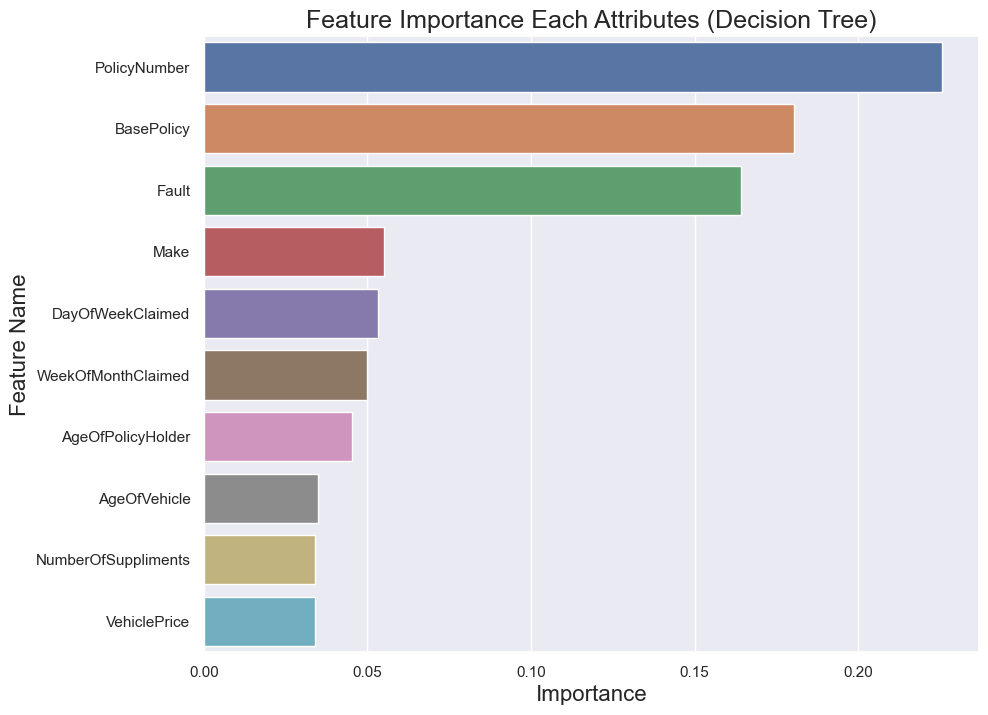

In [50]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 97.07295762341633')

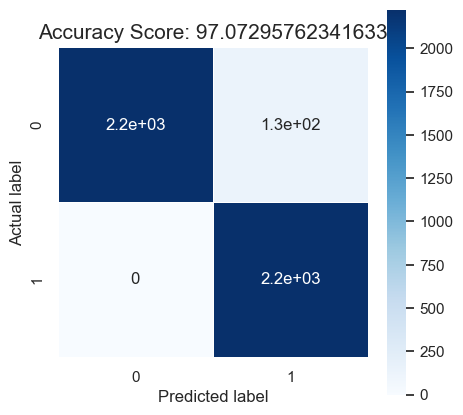

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

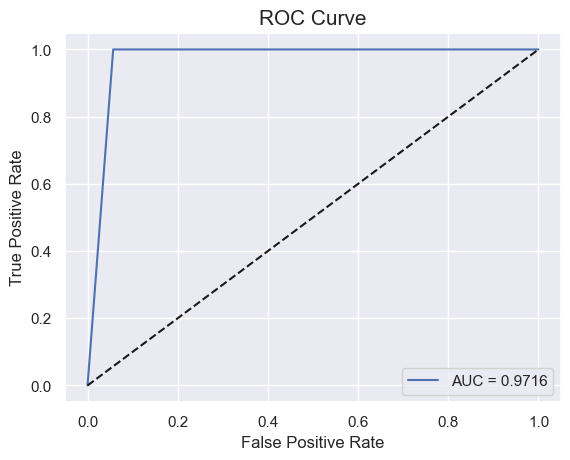

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

joblib.dump(rfc, 'C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\models\\insurance_fraud_detection_random_forest_model2.pkl')

['C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\models\\insurance_fraud_detection_random_forest_model2.pkl']

In [54]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.67 %


In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9966360170441804
Precision Score :  0.9932945909700491
Recall Score :  1.0


In [56]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
6,Fault,0.171035
10,PolicyNumber,0.155128
0,Make,0.072107
24,BasePolicy,0.068289
2,DayOfWeekClaimed,0.058325
3,WeekOfMonthClaimed,0.057892
7,PolicyType,0.053947
17,AgeOfPolicyHolder,0.049431
12,DriverRating,0.047525
16,AgeOfVehicle,0.043848


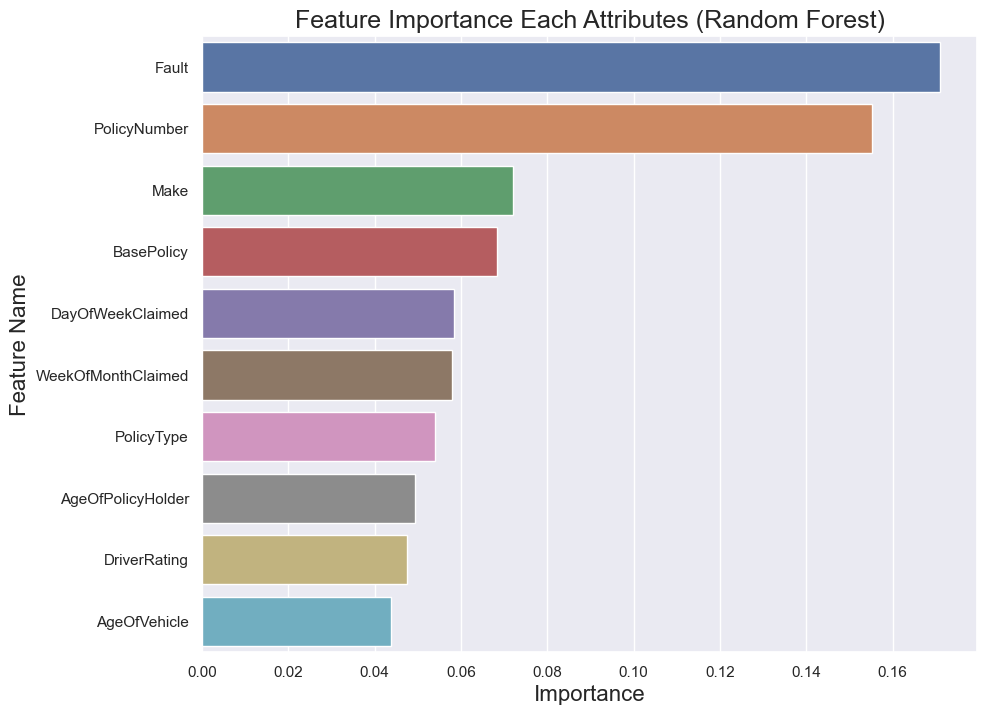

In [57]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 99.67234600262124')

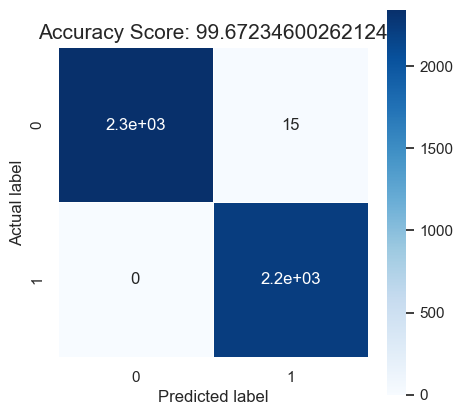

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

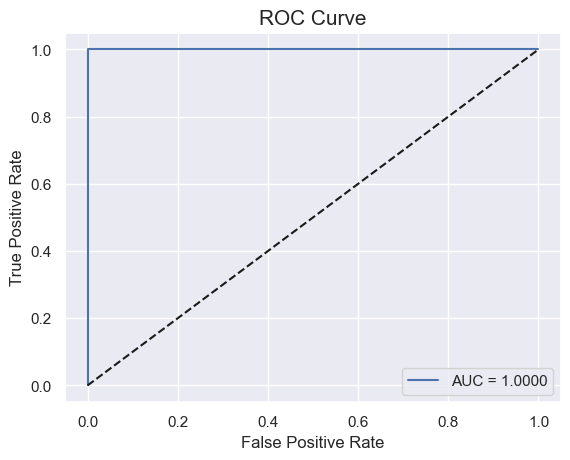

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## Conclusion

In this project, I analyzed vehicle insurance claim fraud using various machine learning techniques to enhance the accuracy and reliability of fraud detection models. Key findings include the successful implementation of exploratory data analysis (EDA) with Python libraries such as NumPy, Pandas, Seaborn, and Matplotlib, which provided valuable insights into fraud patterns. I employed classification algorithms, specifically the RandomForestClassifier and DecisionTreeClassifier, to effectively identify fraudulent claims. The project demonstrated a structured approach to addressing real-world fraud detection challenges, showcasing the potential of advanced data science methodologies in improving fraud detection systems. Overall, this work contributes to the development of more robust fraud detection models that can be applied in the insurance industry.

Project Completed by [Tajamul Khan](https://github.com/tajamulk)
* For More Projects. Check out my [GitHub](https://github.com/tajamulk)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  

In [62]:
import joblib

# Load the LabelEncoder from the saved file
make_encoder = joblib.load('C:\\Users\\27744\\Desktop\\ClaimsProjectWrlFinal\\FraudUsingText\\encoders\\day_of_week_encoder.pkl')

# Access the classes kept by the encoder
classes = make_encoder.classes_

# Display the mapping
print("Classes in the encoder:", classes)

# Find the encoded value for 'Honda'
honda_encoded_value = make_encoder.transform(['Tuesday'])[0]
print("Encoded value for 'Honda':", honda_encoded_value)

Classes in the encoder: ['0' 'Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday'
 'Wednesday']
Encoded value for 'Honda': 6
